In [11]:
# 克隆clone或同步更新pull仓库

!git pull https://github.com/Chenyinlin-Yiking/U-Net-Medical-Segementation.git

From https://github.com/Chenyinlin-Yiking/U-Net-Medical-Segementation
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [12]:
# 项目根目录


%cd /kaggle/working/U-Net-Medical-Segementation

/kaggle/working/U-Net-Medical-Segementation


In [13]:
# 模型训练 + 预测分割

!python main.py --train ./data/membrane/train --test ./data/membrane/test --steps 100 --epochs 30

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
# 删除预测分割结果（为再次验证准备）

!rm *[0-9]_predict.png
!rm state.db
!ls

rm: cannot remove '*[0-9]_predict.png': No such file or directory
rm: cannot remove 'state.db': No such file or directory
0.png	11.png	14.png	17.png	2.png	22.png	25.png	28.png	4.png  7.png
1.png	12.png	15.png	18.png	20.png	23.png	26.png	29.png	5.png  8.png
10.png	13.png	16.png	19.png	21.png	24.png	27.png	3.png	6.png  9.png


In [14]:
# 打印测试集文件列表

%cd /kaggle/working/U-Net-Medical-Segementation/data/membrane/test
!ls

/kaggle/working/U-Net-Medical-Segementation/data/membrane/test
0.png		14_predict.png	2.png		25_predict.png	4.png
0_predict.png	15.png		20.png		26.png		4_predict.png
1.png		15_predict.png	20_predict.png	26_predict.png	5.png
10.png		16.png		21.png		27.png		5_predict.png
10_predict.png	16_predict.png	21_predict.png	27_predict.png	6.png
11.png		17.png		22.png		28.png		6_predict.png
11_predict.png	17_predict.png	22_predict.png	28_predict.png	7.png
12.png		18.png		23.png		29.png		7_predict.png
12_predict.png	18_predict.png	23_predict.png	29_predict.png	8.png
13.png		19.png		24.png		2_predict.png	8_predict.png
13_predict.png	19_predict.png	24_predict.png	3.png		9.png
14.png		1_predict.png	25.png		3_predict.png	9_predict.png


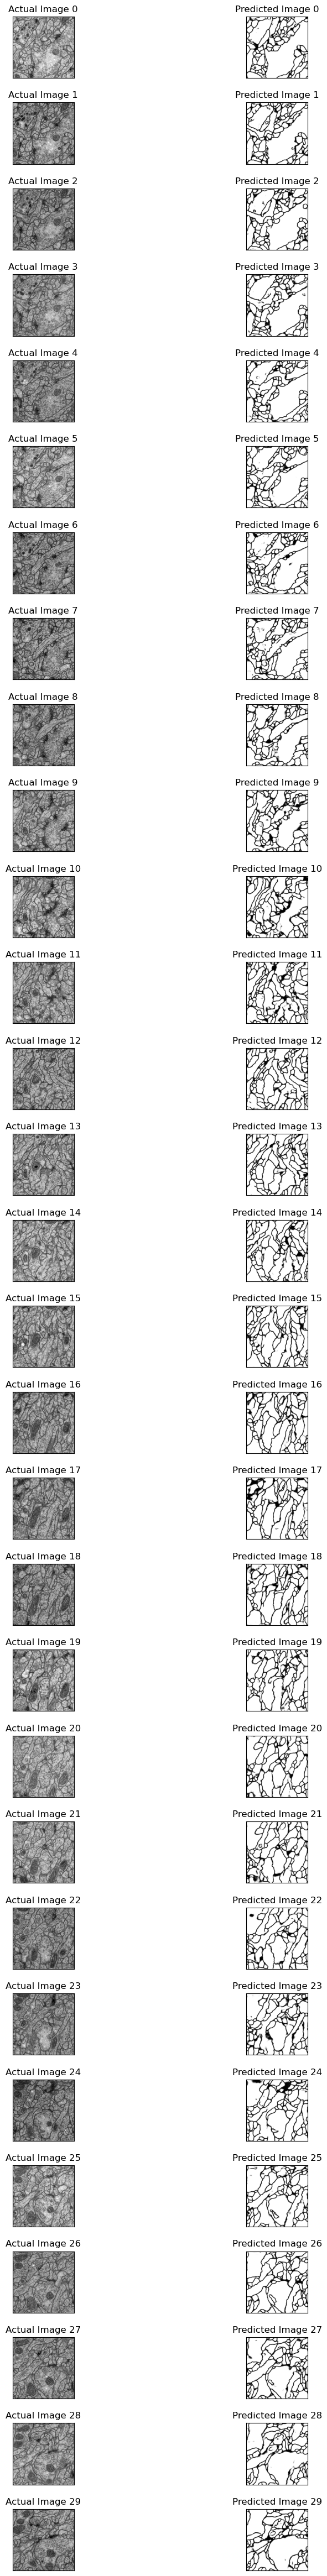

In [17]:
#全部30组结果展示

from PIL import Image
import matplotlib.pyplot as plt

# 展示路径
image_paths = [f"/kaggle/working/U-Net-Medical-Segementation/data/membrane/test/{i}.png" for i in range(30)]

# 设置子图数量
fig, axs = plt.subplots(30, 2, figsize=(10, 60))

for i, path in enumerate(image_paths):
    # 加载图片
    actual_image = Image.open(path).convert('L')
    predicted_image = Image.open(f"/kaggle/working/U-Net-Medical-Segementation/data/membrane/test/{i}_predict.png").convert('L')

    # 在左轴展示待测试图片
    axs[i, 0].imshow(actual_image, cmap='gray')
    axs[i, 0].set_title(f"Actual Image {i}")

    # 在右轴展示预测分割图片
    axs[i, 1].imshow(predicted_image, cmap='gray')
    axs[i, 1].set_title(f"Predicted Image {i}")
    
    # 删除刻度线
    axs[i, 0].set_xticks([])
    axs[i, 0].set_yticks([])
    axs[i, 1].set_xticks([])
    axs[i, 1].set_yticks([])
    
# 调整子图大小
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# 图片展示
plt.show()